In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Velocity model simulation
def CVM(Tmax,beta,sigma,v0,dt):
    T = np.arange(0,Tmax,dt)
    n = len(T)
    V = n*[0]
    V[0] = v0 # set the initial value if you want to start with a different value rather than 0
    dW = np.random.randn(n)*np.sqrt(dt) + 1j *np.random.randn(n)*np.sqrt(dt)# 2d motion 
    for i in range(1,n-1):
        V[i] = V[i-1] - beta*V[i-1] * dt  + sigma *dW[i]
    Z = np.cumsum(V)* dt
    return(Z)

In [6]:
# Simulate the velocity model multiple times
# We look at lags 0,...,100
matrix_1 = np.zeros((10000,10000))
for i in range(0,10000):
    n = CVM(11000,1,1,0,0.1).real
    matrix_1[i,:] = np.array(n[::10][10:10010]) * np.array(n[::10][10])  
    # put the numerical covariance on the same scale as the theoretical covariance

In [7]:
np.savetxt('matrix_mean_covariance_function',matrix_1.mean(axis=0))

In [8]:
print(matrix_1.mean(axis=0))

[ 8.60146839  8.92243116  9.03314285 ... 12.094853   12.11623531
 12.11345289]


In [13]:
np.mean(matrix_1.mean(axis=0))

9.860461719868605

In [9]:
E_XY = matrix_1.mean(axis=0)
# We assume the mean of the process is 0

In [10]:
# Calculate the theoretical covariance
sigma = 1
a = 1 
s= 10
t = np.array(range(10,10010))
theor_cov = np.zeros(len(t))
gamma= np.zeros(len(t))
for i in range(0,len(t)):
    gamma[i] = min(t[i],s) 

In [11]:
theor_cov= (0.5*sigma**2/a**3)*(2*np.exp(-a*gamma) - np.exp(-a*(t+gamma)) - np.exp(-a*np.abs(t-gamma)) + 2* np.exp(-a*t) +2*a*gamma -2 )

In [14]:
theor_cov


array([8.5000908 , 8.81612238, 8.9323839 , ..., 9.0000454 , 9.0000454 ,
       9.0000454 ])

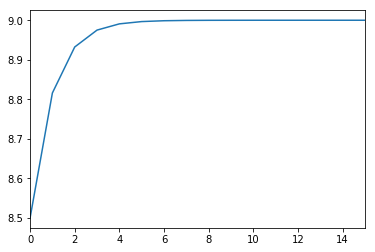

In [19]:
plt.plot(theor_cov)
plt.xlim(0,15)
plt.show()

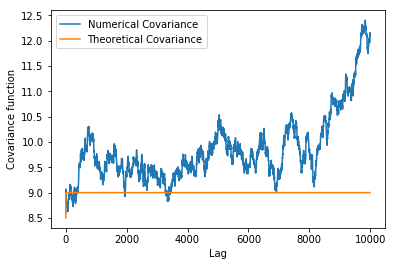

In [12]:
plt.plot(matrix_1.mean(axis=0),label="Numerical Covariance")
plt.plot(theor_cov ,label='Theoretical Covariance' )
plt.xlabel('Lag')
plt.ylabel('Covariance function')
plt.legend()
plt.show()